<a href="https://colab.research.google.com/github/lipipatil/NEUBigDataALY6110/blob/main/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
# install java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

# set your spark folder to your system path environment. 
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"


# install findspark using pip
!pip install -q findspark

In [38]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName("boston_housing_dataset").getOrCreate()

In [39]:
#1. Read the given CSV file
dfbostonhousing = spark.read.csv("BostonHousing.csv", inferSchema=True,header=True)

In [6]:
#2. Show the first 5 elements of your dataset
dfbostonhousing.show(5)

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
only showing top 5 rows



In [7]:
#3. Count number of observation in the given dataset
dfbostonhousing.count()

506

In [8]:
#4. Show the Schema of your dataset
dfbostonhousing.printSchema()

root
 |-- crim: double (nullable = true)
 |-- zn: double (nullable = true)
 |-- indus: double (nullable = true)
 |-- chas: integer (nullable = true)
 |-- nox: double (nullable = true)
 |-- rm: double (nullable = true)
 |-- age: double (nullable = true)
 |-- dis: double (nullable = true)
 |-- rad: integer (nullable = true)
 |-- tax: integer (nullable = true)
 |-- ptratio: double (nullable = true)
 |-- b: double (nullable = true)
 |-- lstat: double (nullable = true)
 |-- medv: double (nullable = true)



In [14]:
#5. Drop the column "b" from your dataset
dfbostonhousing1 = dfbostonhousing.drop("b")
dfbostonhousing1.printSchema()

root
 |-- crim: double (nullable = true)
 |-- indus: double (nullable = true)
 |-- chas: integer (nullable = true)
 |-- nox: double (nullable = true)
 |-- rm: double (nullable = true)
 |-- age: double (nullable = true)
 |-- dis: double (nullable = true)
 |-- rad: integer (nullable = true)
 |-- tax: integer (nullable = true)
 |-- ptratio: double (nullable = true)
 |-- b: double (nullable = true)
 |-- lstat: double (nullable = true)
 |-- medv: double (nullable = true)



In [19]:
#6. Round all of the numerical columns into two decimal place

from pyspark.sql.functions import round, col
for data in dfbostonhousing1.columns:
  dfbostonhousing1 = dfbostonhousing1.withColumn(data, round(data,2))
dfbostonhousing1.show()

+----+-----+----+----+----+-----+----+---+---+-------+------+-----+----+
|crim|indus|chas| nox|  rm|  age| dis|rad|tax|ptratio|     b|lstat|medv|
+----+-----+----+----+----+-----+----+---+---+-------+------+-----+----+
|0.01| 2.31|   0|0.54|6.58| 65.2|4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.03| 7.07|   0|0.47|6.42| 78.9|4.97|  2|242|   17.8| 396.9| 9.14|21.6|
|0.03| 7.07|   0|0.47|7.19| 61.1|4.97|  2|242|   17.8|392.83| 4.03|34.7|
|0.03| 2.18|   0|0.46| 7.0| 45.8|6.06|  3|222|   18.7|394.63| 2.94|33.4|
|0.07| 2.18|   0|0.46|7.15| 54.2|6.06|  3|222|   18.7| 396.9| 5.33|36.2|
|0.03| 2.18|   0|0.46|6.43| 58.7|6.06|  3|222|   18.7|394.12| 5.21|28.7|
|0.09| 7.87|   0|0.52|6.01| 66.6|5.56|  5|311|   15.2| 395.6|12.43|22.9|
|0.14| 7.87|   0|0.52|6.17| 96.1|5.95|  5|311|   15.2| 396.9|19.15|27.1|
|0.21| 7.87|   0|0.52|5.63|100.0|6.08|  5|311|   15.2|386.63|29.93|16.5|
|0.17| 7.87|   0|0.52| 6.0| 85.9|6.59|  5|311|   15.2|386.71| 17.1|18.9|
|0.22| 7.87|   0|0.52|6.38| 94.3|6.35|  5|311|   15

In [23]:
#7. Create a new column (Age10)  with 10% increasing of 'age' column
dfboston = dfbostonhousing1.withColumn("Age10",round((col("age") + (col("age")* 10)/100 ),2))
dfboston.show(5)

+----+-----+----+----+----+----+----+---+---+-------+------+-----+----+-----+
|crim|indus|chas| nox|  rm| age| dis|rad|tax|ptratio|     b|lstat|medv|Age10|
+----+-----+----+----+----+----+----+---+---+-------+------+-----+----+-----+
|0.01| 2.31|   0|0.54|6.58|65.2|4.09|  1|296|   15.3| 396.9| 4.98|24.0|71.72|
|0.03| 7.07|   0|0.47|6.42|78.9|4.97|  2|242|   17.8| 396.9| 9.14|21.6|86.79|
|0.03| 7.07|   0|0.47|7.19|61.1|4.97|  2|242|   17.8|392.83| 4.03|34.7|67.21|
|0.03| 2.18|   0|0.46| 7.0|45.8|6.06|  3|222|   18.7|394.63| 2.94|33.4|50.38|
|0.07| 2.18|   0|0.46|7.15|54.2|6.06|  3|222|   18.7| 396.9| 5.33|36.2|59.62|
+----+-----+----+----+----+----+----+---+---+-------+------+-----+----+-----+
only showing top 5 rows



(array([  7.,   7.,   9.,  22.,   6.,  23.,  24.,  18.,  18.,  14.,  20.,
         18.,  17.,  22.,  19.,  23.,  34.,  37.,  57., 111.]),
 array([  3.19  ,   8.5305,  13.871 ,  19.2115,  24.552 ,  29.8925,
         35.233 ,  40.5735,  45.914 ,  51.2545,  56.595 ,  61.9355,
         67.276 ,  72.6165,  77.957 ,  83.2975,  88.638 ,  93.9785,
         99.319 , 104.6595, 110.    ]),
 <a list of 20 Patch objects>)

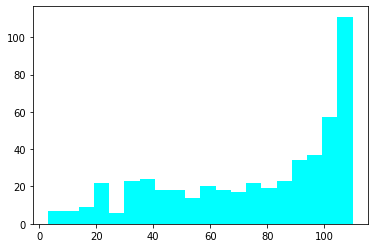

In [36]:
#8. Plot Age10 column on a 2D Plot
#!pip install pyspark-dist-explore
from pyspark_dist_explore import hist
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
hist(ax, dfboston.select('Age10'), bins = 20, color=['cyan'])

In [30]:
#9. Provide Summary Statistics of all columns (count, mean, stddev,min, max)
dfboston.describe().show()

+-------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+
|summary|              crim|             indus|              chas|               nox|                rm|               age|               dis|              rad|               tax|           ptratio|                 b|             lstat|              medv|             Age10|
+-------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+
|  count|               506|               506|               506|               506|               506|               506|               506|              506|               

In [27]:
#9. Convert Spark Dataframe to Pandas Dataframe
dfboston_pandas = dfboston.toPandas()
print(dfboston_pandas)

     crim  indus  chas   nox    rm   age   dis  rad  tax  ptratio       b  \
0    0.01   2.31     0  0.54  6.58  65.2  4.09    1  296     15.3  396.90   
1    0.03   7.07     0  0.47  6.42  78.9  4.97    2  242     17.8  396.90   
2    0.03   7.07     0  0.47  7.19  61.1  4.97    2  242     17.8  392.83   
3    0.03   2.18     0  0.46  7.00  45.8  6.06    3  222     18.7  394.63   
4    0.07   2.18     0  0.46  7.15  54.2  6.06    3  222     18.7  396.90   
..    ...    ...   ...   ...   ...   ...   ...  ...  ...      ...     ...   
501  0.06  11.93     0  0.57  6.59  69.1  2.48    1  273     21.0  391.99   
502  0.05  11.93     0  0.57  6.12  76.7  2.29    1  273     21.0  396.90   
503  0.06  11.93     0  0.57  6.98  91.0  2.17    1  273     21.0  396.90   
504  0.11  11.93     0  0.57  6.79  89.3  2.39    1  273     21.0  393.45   
505  0.05  11.93     0  0.57  6.03  80.8  2.51    1  273     21.0  396.90   

     lstat  medv   Age10  
0     4.98  24.0   71.72  
1     9.14  21.6   86

In [28]:
#10. Show the last 5 rows of Pandas DataFrame
dfboston_pandas.tail(5)

,crim,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,Age10
501,0.06,11.93,0,0.57,6.59,69.1,2.48,1,273,21.0,391.99,9.67,22.4,76.01
502,0.05,11.93,0,0.57,6.12,76.7,2.29,1,273,21.0,396.90,9.08,20.6,84.37
503,0.06,11.93,0,0.57,6.98,91.0,2.17,1,273,21.0,396.90,5.64,23.9,100.10
504,0.11,11.93,0,0.57,6.79,89.3,2.39,1,273,21.0,393.45,6.48,22.0,98.23
505,0.05,11.93,0,0.57,6.03,80.8,2.51,1,273,21.0,396.90,7.88,11.9,88.88
